In [25]:
import pandas as pd

In [26]:
s = pd.Series([10,20,30,40,50])
print(s)

#indexing
print(s[1])
print(s[2])

#label
s = pd.Series([1,2,3,4], index = ['a', 'b', 'c', 'd'])
print(s['b'])
print(s['b'])
print(s.iloc[0])
print(s.index)

0    10
1    20
2    30
3    40
4    50
dtype: int64
20
30
2
2
1
Index(['a', 'b', 'c', 'd'], dtype='object')


In [27]:
s1 = pd.Series([1,2,3,4,5])
s2 = pd.Series([10,20,30,40,50])

print(s1 + s2)

print(s1[0])
changed_val = s1.drop(0)
print("s\n",s1)
print("changed\n",changed_val)

0    11
1    22
2    33
3    44
4    55
dtype: int64
1
s
 0    1
1    2
2    3
3    4
4    5
dtype: int64
changed
 1    2
2    3
3    4
4    5
dtype: int64


In [28]:
# dataframe

info = {
    'Name' : ['Alice', 'Bob', 'Charlie', 'David'],
    'Age' : [24, 27, 22, 32],
    'City' : ['New York', 'Los Angeles', 'Chicago', 'Houston']
}

df = pd.DataFrame(info)
df
print(df.index)
print(df.columns)


RangeIndex(start=0, stop=4, step=1)
Index(['Name', 'Age', 'City'], dtype='object')


In [29]:
df = pd.DataFrame([['Adam', '23'],['Adam', '23'],['Adam', '23'],['Adam', '23']], columns=['Name', 'Age'])
df

,Name,Age
0,Adam,23
1,Adam,23
2,Adam,23
3,Adam,23


In [30]:
import numpy as np

np_arr = np.array([[1,2,3],[4,5,6],[7,8,9]])
df = pd.DataFrame(np_arr, columns=['A', 'B', 'C'])
df

,A,B,C
0,1,2,3
1,4,5,6
2,7,8,9


In [31]:
df = pd.read_csv('../Pandas/data/employee_data.csv')
print(df)

   ID     Name  Age Department  Salary
0   1    Alice   25         HR   55000
1   2      Bob   32         IT   72000
2   3  Charlie   28    Finance   48000
3   4    David   45  Marketing   91000
4   5      Eva   38         IT   65000
5   6    Frank   29    Finance   50000
6   7    Grace   41         HR   82000
7   8   Hannah   26  Marketing   47000
8   9      Ian   35         IT   75000
9  10    Julia   30    Finance   60000


In [32]:
df = pd.read_json('../Pandas/data/employee_data.json')
df.head()
df.tail()
df.sample()
df.info()
df.shape
df.describe()
df.nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          10 non-null     int64 
 1   Name        10 non-null     object
 2   Age         10 non-null     int64 
 3   Department  10 non-null     object
 4   Salary      10 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 528.0+ bytes


ID            10
Name          10
Age           10
Department     4
Salary        10
dtype: int64

In [33]:
df

,ID,Name,Age,Department,Salary
0,1,Alice,25,HR,55000
1,2,Bob,32,IT,72000
2,3,Charlie,28,Finance,48000
3,4,David,45,Marketing,91000
4,5,Eva,38,IT,65000
5,6,Frank,29,Finance,50000
6,7,Grace,41,HR,82000
7,8,Hannah,26,Marketing,47000
8,9,Ian,35,IT,75000
9,10,Julia,30,Finance,60000


In [34]:
#AQI data

df = pd.read_csv('../Pandas/data/globalAirQuality.csv')
df.head()

,timestamp,country,city,latitude,longitude,pm25,pm10,no2,so2,o3,co,aqi,temperature,humidity,wind_speed
0,2025-11-04 18:25:17.554219,US,New York,40.713,-74.006,50.295,108.938,27.998,6.539,52.568,1.096,108,18.504,70.168,3.725
1,2025-11-04 19:25:17.554219,US,New York,40.713,-74.006,32.083,63.043,36.120,4.021,43.536,1.075,90,5.838,80.088,8.969
2,2025-11-04 20:25:17.554219,US,New York,40.713,-74.006,42.250,82.553,26.935,9.538,23.320,0.977,84,31.833,62.783,9.650
3,2025-11-04 21:25:17.554219,US,New York,40.713,-74.006,30.403,79.951,63.536,7.609,31.369,0.230,158,23.140,89.153,8.956
4,2025-11-04 22:25:17.554219,US,New York,40.713,-74.006,21.083,66.423,38.997,6.919,45.615,1.085,97,13.632,76.499,4.017


In [35]:
# selecting data

df[['city', 'aqi']]

# loc - index / iloc - index location

df.loc[0]
df.loc[0 : 3] #in loc start and end both are inclusive 

df.iloc[0:3] #in iloc start is inclusive end is exclusive 

# cells

df.loc[0 : 2, ['city','aqi']]

df.iloc[0 : 4, 1:5]

# cities = df['city'].copy()
# cities[0] = "Mumbai"
# cities
df.at[0 , 'city']
df.iat[0, 0]

'2025-11-04 18:25:17.554219'

In [36]:
#filtering of data

df [ (df['aqi'] > 100) & (df['temperature'] > 30)]
df [ (df['aqi'] > 100) & (df['temperature']  <30)]

aqi_data = df [ (df['aqi'] > 100) & (df['temperature'] > 30) ] [['city', 'aqi']]

aqi_data

aqi_data.iloc[0]

city    New York
aqi          155
Name: 6, dtype: object

In [37]:
# query - returns copy
aqi_val = 100
df.query('aqi > @aqi_val & temperature > 12')[['city', 'aqi']].copy()

,city,aqi
0,New York,108
3,New York,158
6,New York,155
7,New York,115
8,New York,121
...,...,...
17988,Zurich,122
17991,Zurich,104
17993,Zurich,153
17996,Zurich,105


In [38]:
# cleaning data

df = pd.read_csv('../Pandas/data/raw_data.csv')
df.isna()
df.isnull().sum()
df.dropna().copy()
# df.dropna(axis = 1).copy()
age_mean = df['age'].mean()
cleaned_data = df.copy()
cleaned_data
cleaned_data['age'] = cleaned_data['age'].fillna(age_mean)
cleaned_data
cleaned_data.ffill()
cleaned_data.bfill()


,id,name,age,country,gender,income
0,1,John Doe,29.00,USA,Male,55000.0
1,1,John Doe,29.00,USA,Male,55000.0
2,2,Jane Smith,32.75,Canada,Female,62000.0
3,3,Alex,32.75,USA,Unknown,47000.0
4,4,Maria Garcia,34.00,Spain,Female,51000.0
5,5,Li Wei,27.00,China,Male,51000.0
6,6,Ahmed Khan,45.00,India,Female,73000.0
7,7,Ahmed Khan,38.00,USA,Male,68000.0
8,8,Rachel Lee,29.00,USA,Female,62000.0
9,9,Carlos Ruiz,32.75,Mexico,Male,45000.0


In [39]:
#handling duplicate values

df.duplicated()
copied_df = df.copy()
df.drop_duplicates()

,id,name,age,country,gender,income
0,1,John Doe,29.0,USA,Male,55000.0
2,2,Jane Smith,NaN,Canada,Female,62000.0
3,3,Alex,NaN,USA,Unknown,47000.0
4,4,Maria Garcia,34.0,Spain,Female,NaN
5,5,Li Wei,27.0,China,Male,51000.0
6,6,NaN,45.0,India,Female,73000.0
7,7,Ahmed Khan,38.0,NaN,Male,68000.0
8,8,Rachel Lee,29.0,USA,Female,62000.0
9,9,Carlos Ruiz,NaN,Mexico,Male,45000.0
10,10,Emily Davis,31.0,USA,NaN,58000.0


In [40]:
# data types

df.dtypes
df2 = df.copy()
df2 = df2.fillna(0)
df2['age']  = df2['age'].astype('int64').copy()
df2.dtypes

#handle strings

df['gender'].str.lower()
df['gender'].str.upper()
df['gender'].str.capitalize()

df2['name'].str.split(" ")

df2['country'].str.contains("india", case=False)

0     False
1     False
2     False
3     False
4     False
5     False
6      True
7       NaN
8     False
9     False
10    False
Name: country, dtype: object

In [41]:
df2

,id,name,age,country,gender,income
0,1,John Doe,29,USA,Male,55000.0
1,1,John Doe,29,USA,Male,55000.0
2,2,Jane Smith,0,Canada,Female,62000.0
3,3,Alex,0,USA,Unknown,47000.0
4,4,Maria Garcia,34,Spain,Female,0.0
5,5,Li Wei,27,China,Male,51000.0
6,6,0,45,India,Female,73000.0
7,7,Ahmed Khan,38,0,Male,68000.0
8,8,Rachel Lee,29,USA,Female,62000.0
9,9,Carlos Ruiz,0,Mexico,Male,45000.0


In [42]:
aqi_data = pd.read_csv('../Pandas/data/globalAirQuality.csv')

aqi_data_copy = aqi_data.copy()

aqi_data_copy['timestamp'] = pd.to_datetime(aqi_data_copy['timestamp'])
aqi_data_copy['timestamp'].dtypes


dtype('<M8[ns]')

Feature Engineering


In [70]:
# df2['tax'] = df2['income'].apply(lambda x : "20%" if x >= 50000 else "10%")

# df2['tax'] = np.where(
#     df2['income'] >= 60000,
#     '20%',
#     '10%'
# )

# # when we pass a fucntion in apply() --> then the apply is called as higher order function(HOF)

# gender_map = {
#     "Male" : 'M',
#     "Female" : 'F',
#     "Unknown" : 'U',
#     "M" : 'M',
#     "F" : 'F',
#     "U" : 'U'
# }

# df2['gender'] = df2['gender'].map(gender_map)
# df2.assign(new_income = df2['income'] * 1.1)

# df2['country'] = df2['country'].replace('USA', "US")
# df2.columns = [col.capitalize() for col in df2.columns]
df2.rename(columns={'Income' : 'Salary'})
df2.rename(index={1 : 'first'})

sorted_df = df2.sort_values(['Income','Age']) 
sorted_df.sort_index()

# reset
sorted_df.reset_index(drop = True)

#rank
sorted_df['Ranking'] = sorted_df['Income'].rank(ascending=False, method='min')

In [71]:
sorted_df

,Id,Name,Age,Country,Gender,Income,Tax,Ranking
4,4,Maria Garcia,34,Spain,F,0.0,10%,11.0
9,9,Carlos Ruiz,0,Mexico,M,45000.0,10%,10.0
3,3,Alex,0,US,U,47000.0,10%,9.0
5,5,Li Wei,27,China,M,51000.0,10%,8.0
0,1,John Doe,29,US,M,55000.0,10%,6.0
1,1,John Doe,29,US,M,55000.0,10%,6.0
10,10,Emily Davis,31,US,NaN,58000.0,10%,5.0
2,2,Jane Smith,0,Canada,F,62000.0,20%,3.0
8,8,Rachel Lee,29,US,F,62000.0,20%,3.0
7,7,Ahmed Khan,38,0,M,68000.0,20%,2.0


In [72]:
df2

,Id,Name,Age,Country,Gender,Income,Tax
0,1,John Doe,29,US,M,55000.0,10%
1,1,John Doe,29,US,M,55000.0,10%
2,2,Jane Smith,0,Canada,F,62000.0,20%
3,3,Alex,0,US,U,47000.0,10%
4,4,Maria Garcia,34,Spain,F,0.0,10%
5,5,Li Wei,27,China,M,51000.0,10%
6,6,0,45,India,F,73000.0,20%
7,7,Ahmed Khan,38,0,M,68000.0,20%
8,8,Rachel Lee,29,US,F,62000.0,20%
9,9,Carlos Ruiz,0,Mexico,M,45000.0,10%


In [79]:
# df[[cols for cols in df.columns if cols == 'id' df.at[] ]]
df2 = df.copy()
new_col_order = [col for col in df.columns if col != 'id' ] + ['id']
print(new_col_order)
df2[new_col_order]

['name', 'age', 'country', 'gender', 'income', 'id']


,name,age,country,gender,income,id
0,John Doe,29.0,USA,Male,55000.0,1
1,John Doe,29.0,USA,Male,55000.0,1
2,Jane Smith,NaN,Canada,Female,62000.0,2
3,Alex,NaN,USA,Unknown,47000.0,3
4,Maria Garcia,34.0,Spain,Female,NaN,4
5,Li Wei,27.0,China,Male,51000.0,5
6,NaN,45.0,India,Female,73000.0,6
7,Ahmed Khan,38.0,NaN,Male,68000.0,7
8,Rachel Lee,29.0,USA,Female,62000.0,8
9,Carlos Ruiz,NaN,Mexico,Male,45000.0,9


In [99]:
df2 = df.copy()

df2.duplicated()
df2 = df2.drop_duplicates()
df2.isna()
df2['name'] = df2['name'].fillna('Unknown')
df2['age'] = df2['age'].fillna(round(df2['age'].mean(),0))
df2['country'] = df2['country'].ffill()
df2['gender'] = df2['gender'].bfill()
df2['income'] = df2['income'].fillna(df2['income'].median())
df2 = df2.sort_values('income')
df2 = df2.reset_index(drop = True)
df2.to_csv('cleaned_employee_data.csv', index = False)
df2

,id,name,age,country,gender,income
0,9,Carlos Ruiz,33.0,Mexico,Male,45000.0
1,3,Alex,33.0,USA,Unknown,47000.0
2,5,Li Wei,27.0,China,Male,51000.0
3,1,John Doe,29.0,USA,Male,55000.0
4,4,Maria Garcia,34.0,Spain,Female,58000.0
5,10,Emily Davis,31.0,USA,NaN,58000.0
6,2,Jane Smith,33.0,Canada,Female,62000.0
7,8,Rachel Lee,29.0,USA,Female,62000.0
8,7,Ahmed Khan,38.0,India,Male,68000.0
9,6,Unknown,45.0,India,Female,73000.0


In [110]:
df.groupby('country')['income'].mean()
df.groupby('country')['income'].min()
df.groupby('country')['income'].max()

df.groupby('country')['income'].aggregate(['mean', 'min', 'max'])
df.groupby('country')['income'].agg(avg_salary = 'mean', min_salary = 'min', max_salary = 'max')

df.groupby('country').agg(
   max_salary = ('income' , 'max'),
   max_age = ('age', 'max')
)

,max_salary,max_age
country,,
Canada,62000.0,NaN
China,51000.0,27.0
India,73000.0,45.0
Mexico,45000.0,NaN
Spain,NaN,34.0
USA,62000.0,31.0


In [129]:
df = pd.DataFrame({
    'country' : ['US', 'US', 'India', 'India'],
    'year' : [2020, 2021, 2020, 2021],
    'sales' : [100, 150, 200, 250],
    'profit' : [20, 30, 50, 70],
    })

# melting
melted_df = df.melt(
    id_vars= [ 'country', 'year' ],
    value_vars= [ 'sales', 'profit' ],
    var_name= 'financial_metric',
    value_name= 'amount',
)
print(melted_df)

reverted_df = melted_df.pivot_table(
    index = ['country', 'year'],
    columns='financial_metric',
    values='amount'
)
reverted_df

  country  year financial_metric  amount
0      US  2020            sales     100
1      US  2021            sales     150
2   India  2020            sales     200
3   India  2021            sales     250
4      US  2020           profit      20
5      US  2021           profit      30
6   India  2020           profit      50
7   India  2021           profit      70


financial_metric  profit  sales
country year                   
India   2020          50    200
        2021          70    250
US      2020          20    100
        2021          30    150

In [113]:
df

,country,year,sales,profit,tax
0,US,2020,100,20,5
1,US,2021,150,30,7
2,India,2020,200,50,10
3,India,2021,250,70,12


<AxesSubplot: xlabel='Age', ylabel='Salary'>

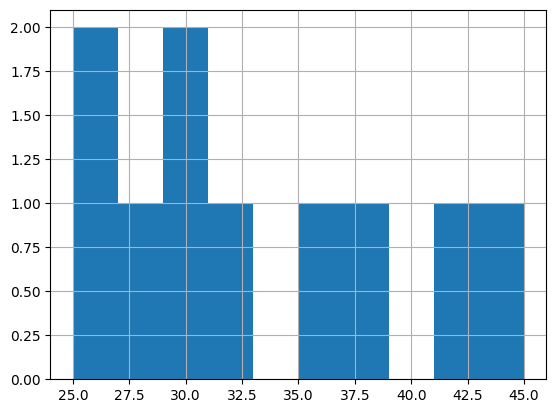

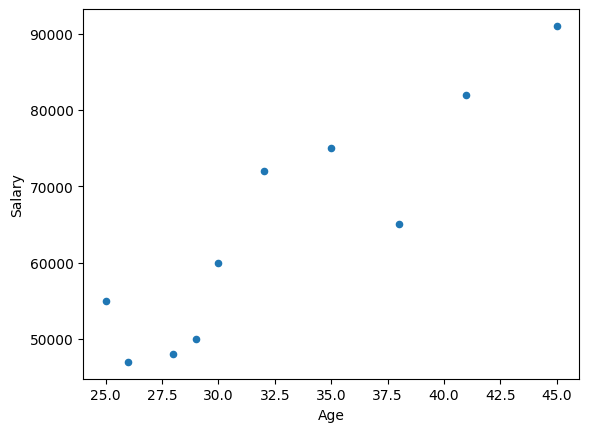

In [128]:
df = pd.read_csv('../Pandas/data/employee_data.csv')
df['Age'].hist()

df.plot(kind="scatter" , x='Age', y='Salary')

In [130]:
df_customers = pd.DataFrame({
    "customer_id" : [1,2,3,4],
    "name" : ['Adam', 'Bob', 'Charlie', 'Dave']
})

df_orders = pd.DataFrame({
    'order_id' : [101,102,103,104],
    "customer_id" : [2,1,4,5],
    "amount" : [500,250,900,360]
})



In [ ]:
inner_joint = pd.merge(df_customers, df_orders, on = 'customer_id')

outer_joint =  pd.merge(df_customers, df_orders,how = 'outer', on = 'customer_id')

left_joint = pd.merge(df_customers, df_orders, how = 'left', on = 'customer_id')

right_joint = pd.merge(df_customers, df_orders,how = 'right' , on = 'customer_id')
print('---- inner ----')
print(inner_joint)
print('---- outer ----')
print(outer_joint)
print('---- left ----')
print(left_joint)
print('---- right ----')
print(right_joint)

'''
inner join - only common values from both tables
outer join - all values from both tables
left join - value from left table 
right01 join - value from right table 
'''

---- inner ----
   customer_id  name  order_id  amount
0            1  Adam       102     250
1            2   Bob       101     500
2            4  Dave       103     900
---- outer ----
   customer_id     name  order_id  amount
0            1     Adam     102.0   250.0
1            2      Bob     101.0   500.0
2            3  Charlie       NaN     NaN
3            4     Dave     103.0   900.0
4            5      NaN     104.0   360.0
---- left ----
   customer_id     name  order_id  amount
0            1     Adam     102.0   250.0
1            2      Bob     101.0   500.0
2            3  Charlie       NaN     NaN
3            4     Dave     103.0   900.0
---- right ----
   customer_id  name  order_id  amount
0            2   Bob       101     500
1            1  Adam       102     250
2            4  Dave       103     900
3            5   NaN       104     360


In [132]:
print(df_customers)
print(df_orders)

   customer_id     name
0            1     Adam
1            2      Bob
2            3  Charlie
3            4     Dave
   order_id  customer_id  amount
0       101            2     500
1       102            1     250
2       103            4     900
3       104            5     360


In [ ]:
# data concatenation
'''
stacking df on top of each other(rows) or side by side(columns)
'''

df1 = pd.DataFrame({
    'id' : [1,2,3],
    'name' : ['Prasad', 'Nisha', 'Abc']
})
df2 = pd.DataFrame({
    'id' : [4,5,6],
    'name' : ['Prasad', 'Nisha', 'Abc']
})

pd.concat([df1, df2]) #rows
pd.concat([df1, df2], ignore_index=True) #rows
pd.concat([df1, df2],axis=1) #cols

,id,name
0,1,Prasad
1,2,Nisha
2,3,Abc
3,4,Prasad
4,5,Nisha
5,6,Abc
